In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/PizzaVsIcecream/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/PizzaVsIcecream/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/PizzaVsIcecream/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/PizzaVsIcecream/train/icecream')))
print(len(os.listdir('/content/drive/MyDrive/PizzaVsIcecream/test/pizza')))
print(len(os.listdir('/content/drive/MyDrive/PizzaVsIcecream/test/icecream')))

327
391
47
59


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 575 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
18/18 [==============================] - 149s 8s/step - loss: 0.8925 - accuracy: 0.5687 - val_loss: 0.6292 - val_accuracy: 0.8042
Epoch 2/10
18/18 [==============================] - 3s 185ms/step - loss: 0.4855 - accuracy: 0.7965 - val_loss: 0.3927 - val_accuracy: 0.8531
Epoch 3/10
18/18 [==============================] - 3s 175ms/step - loss: 0.3263 - accuracy: 0.8522 - val_loss: 0.3073 - val_accuracy: 0.8811
Epoch 4/10
18/18 [==============================] - 3s 176ms/step - loss: 0.2620 - accuracy: 0.8817 - val_loss: 0.3583 - val_accuracy: 0.8881
Epoch 5/10
18/18 [==============================] - 3s 171ms/step - loss: 0.1499 - accuracy: 0.9339 - val_loss: 0.3733 - val_accuracy: 0.8951
Epoch 6/10
18/18 [==============================] - 3s 184ms/step - loss: 0.1873 - accuracy: 0.9183 - val_loss: 0.3692 - val_accuracy: 0.8531
Epoch 7/10
18/18 [==============================] - 3s 176ms/step - loss: 0.0966 - accuracy: 0.9565 - val_loss: 0.5331 - val_accuracy: 0.8601
Epoch 8

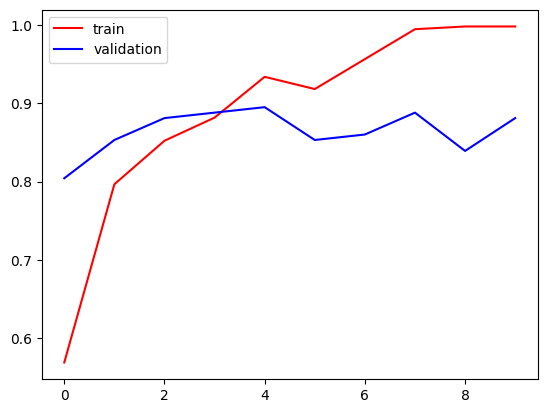

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

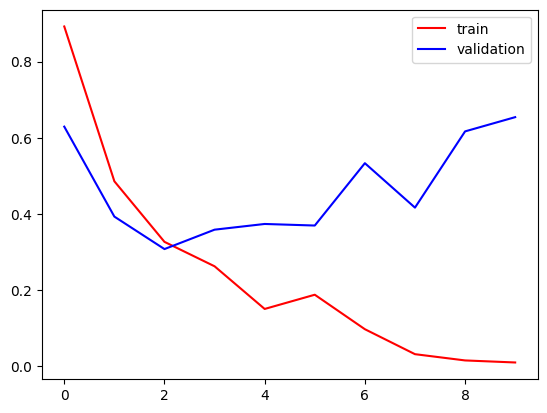

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 106 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

4/4 [==============================] - 34s 11s/step
[[3.32448008e-06]
 [9.96987164e-01]
 [2.12542964e-05]
 [4.01516169e-01]
 [9.70684767e-01]
 [6.54325631e-05]
 [9.99999881e-01]
 [9.85374570e-01]
 [9.99999762e-01]
 [5.04506635e-04]
 [7.33845174e-01]
 [1.09418423e-03]
 [9.12058830e-01]
 [2.47300050e-04]
 [4.85730709e-07]
 [1.01669701e-02]
 [9.99999881e-01]
 [1.09276503e-01]
 [9.99720991e-01]
 [7.08934385e-06]
 [1.08702792e-04]
 [9.99968052e-01]
 [7.62102500e-05]
 [5.20731082e-13]
 [1.56213369e-04]
 [6.60975047e-06]
 [9.99988675e-01]
 [9.99999285e-01]
 [9.99980569e-01]
 [9.99936819e-01]
 [1.38979760e-06]
 [2.05769584e-06]
 [4.94507440e-05]
 [1.00000000e+00]
 [2.37510631e-05]
 [1.92307925e-06]
 [8.17373511e-05]
 [5.45245530e-05]
 [4.98782933e-01]
 [9.64999072e-06]
 [9.99993801e-01]
 [2.54988316e-02]
 [5.33465922e-01]
 [2.44834315e-04]
 [7.50711784e-02]
 [7.40625896e-03]
 [2.47300050e-04]
 [1.70144800e-03]
 [1.24125538e-04]
 [9.99913096e-01]
 [3.16699520e-02]
 [2.95361042e-01]
 [2.90644821

In [13]:
len(predictions)

106

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[37 22]
 [27 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.63      0.60        59
           1       0.48      0.43      0.45        47

    accuracy                           0.54       106
   macro avg       0.53      0.53      0.53       106
weighted avg       0.53      0.54      0.53       106

